<a href="https://colab.research.google.com/github/KainaraDm/Titanik_kaggle_project/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic - Machine Learning from Disaster**

This is training project from kaggle competition [link](https://www.kaggle.com/c/titanic).

#### **Introduction**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**The goal of the project is creating a model to predict survival on the Titanic**

## **1. Import libraries and dataset**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload ()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [ ]:
from google.colab import files
uploaded = files.upload ()

Saving gender_submission.csv to gender_submission.csv


In [448]:
train_df = pd.read_csv ("train.csv")
test_df = pd.read_csv ("test.csv", encoding = 'utf8')
GS_df = pd.read_csv ('gender_submission.csv')

In [247]:
train_df.head (5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
train_df.shape

(891, 12)

In [249]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **2. Data Analysis and Normalize Data**

---

In [250]:
train_df ["Embarked"].value_counts ()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [251]:
train_df ["Parch"].value_counts ()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train_df ["Parch"].mean ()

0.38159371492704824

In [252]:
Age_mean = train_df ["Age"].mean ()
Age_mean

29.69911764705882

In [ ]:
train_df ["Age"].min ()

0.42

In [ ]:
train_df ["Age"].max ()

80.0

In [253]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Embarked_mode = train_df ["Embarked"].mode()
Embarked_mode

0    S
dtype: object

Before we can continue we must deal with these missing values.

In [254]:
train_df ["Age"].fillna(0, inplace = True)
train_df ["Age"].replace(0.0, Age_mean, inplace = True) # The NaN values in Age columns change to mean age value
train_df ["Embarked"].fillna(0, inplace = True)
train_df ["Embarked"].replace(0.0, 'S', inplace = True) # The NaN values in Embarked columns change to the most popular result
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Сonclusions:
1. There are 644 passengers from Southampton port, 168 passengers from Cherbourg port and 77 Queenstown port.
2. There are 678 passengers have no child. 
3. The mean age of Titanic passengers is 29.7. Mininmum age of Titanic passenger is 0.42 years old, maximum age is 80.0 years old.

## **3. Data visualization**


---

In [ ]:
import seaborn as sns

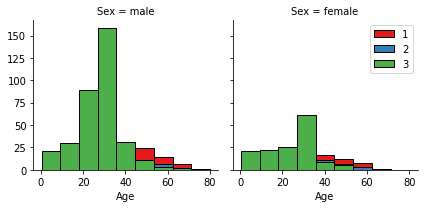

In [ ]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max(), 10)


g = sns.FacetGrid(train_df, col="Sex", hue="Pclass", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

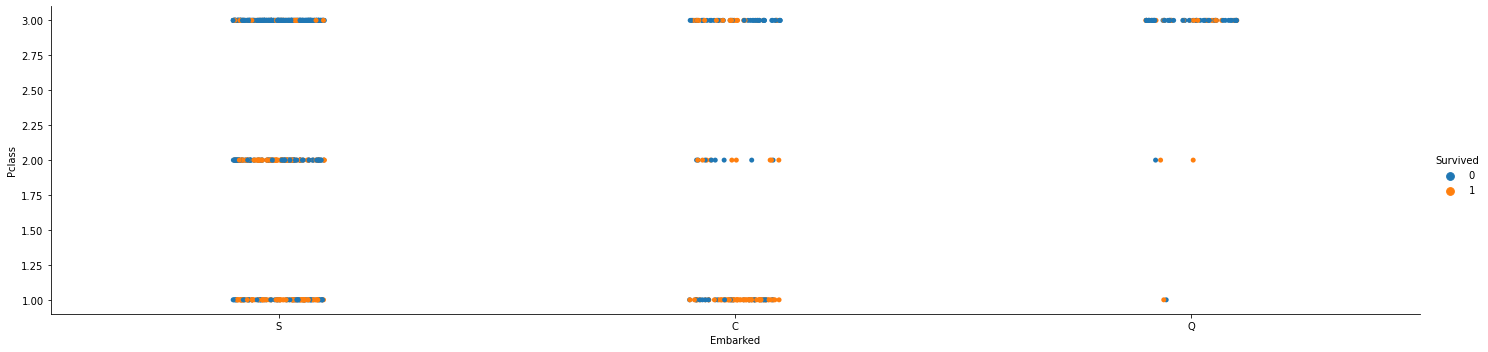

In [ ]:
sns.catplot (x = "Embarked", y = "Pclass", data = train_df, hue="Survived", aspect = 4)

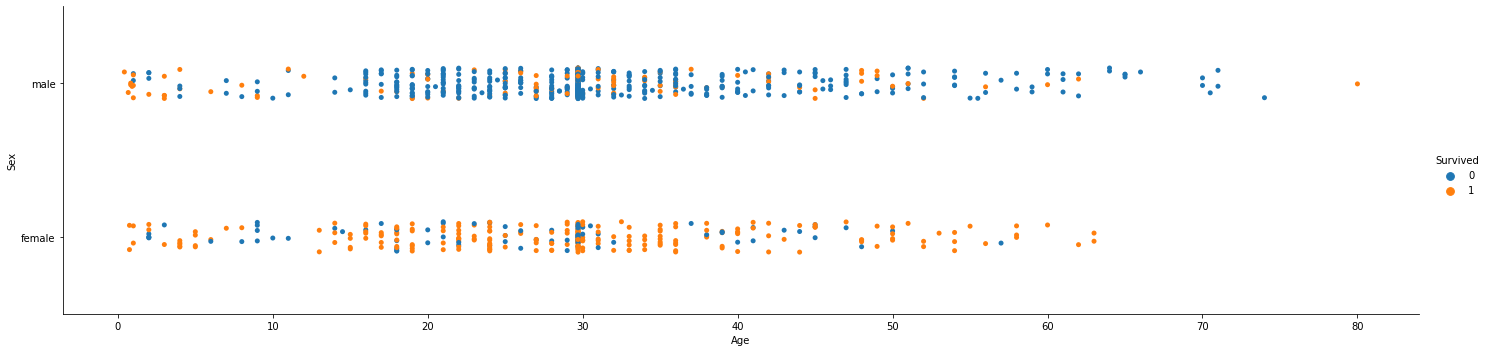

In [ ]:
sns.catplot (x = "Age", y = "Sex", data = train_df, hue="Survived", aspect = 4)

### Сonclusions:
There are correlation between gender, age, passenger class and rate of surviving.

## **4. Data preprocessing**

---



Based on the analysis of the correlation, it will generate the vector Y and the matrix X

In [257]:
y = train_df['Survived'].values
y [0:5]

array([0, 1, 1, 1, 0])

In [256]:
Feature = train_df[['Survived','Pclass','Sex','Age','SibSp', 'Parch', 'Embarked']]
Feature ["Sex"].replace('male', 1, inplace = True)
Feature ["Sex"].replace('female', 0, inplace = True)
Feature = pd.concat([Feature,pd.get_dummies(Feature['Embarked'])], axis=1)
Feature.drop ('Embarked', axis=1, inplace=True)
Feature.drop ('Survived', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [258]:
X = Feature
X[0:5]

,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,3,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,3,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,0,0,1
4,3,1,35.0,0,0,0,0,1


In [259]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X [0:5]

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.63878901,  0.43279337, -0.47367361,
         2.0745051 , -0.30756234, -1.62380254],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.40792596,  0.43279337, -0.47367361,
        -0.48204268, -0.30756234,  0.61583843],
       [ 0.82737724,  0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48204268, -0.30756234,  0.61583843]])

## **5. Modeling**

---


### To create the prediction model it will be used next algoritm:
1. K Nearest Neighbor(KNN) 
2. Decision Tree
3. Support Vector Machine
4. Logistic Regression

### ***1. K Nearest Neighbor(KNN)***

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [260]:
mean_acc = []
for n in range (1,15):
    neigh = KNeighborsClassifier (n_neighbors = n).fit (X, y)
    Yhat = neigh.predict (X)
    mean_acc.append (metrics.accuracy_score (y, Yhat))
mean_acc

[0.9270482603815937,
 0.8608305274971941,
 0.867564534231201,
 0.856341189674523,
 0.8529741863075196,
 0.8361391694725028,
 0.8439955106621774,
 0.8406285072951739,
 0.835016835016835,
 0.8316498316498316,
 0.8305274971941639,
 0.8316498316498316,
 0.8271604938271605,
 0.8237934904601572]

In [261]:
#the max value of mean_acc is 1 at k = 1
neigh1 = KNeighborsClassifier (n_neighbors = 1).fit (X, y)
Yhat1 = neigh1.predict (X)
neigh1_mean_acc = metrics.accuracy_score (y, Yhat1) 
neigh1_mean_acc

0.9270482603815937

### ***2. Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [263]:
drugTree = DecisionTreeClassifier (criterion = "entropy", max_depth = 4)
drugTree.fit (X,y)
predTree = drugTree.predict (X)
predTree [0:5]

array([0, 1, 0, 1, 0])

In [264]:
Tree_mean_acc = metrics.accuracy_score (y, predTree) 
Tree_mean_acc

0.8395061728395061

### ***3. Support Vector Machine***

In [ ]:
from sklearn import svm

In [265]:
clf = svm.SVC (kernel = "rbf")
clf.fit (X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [266]:
SVMpred = clf.predict (X)
SVMpred_mean_acc = metrics.accuracy_score (y, SVMpred) 
SVMpred_mean_acc

0.8417508417508418

### ***4. Logistic Regression***

In [267]:
from sklearn.linear_model import LogisticRegression

In [268]:
LR = LogisticRegression (C = 0.01, solver = "liblinear").fit (X,y)

In [269]:
LRpred = LR.predict (X)
LR_mean_acc = metrics.accuracy_score (y, LRpred) 
LR_mean_acc

0.797979797979798

### Сonclusions:
It`s a accuracy of 4 models are 1. The possibility of overfiting the models are very likely.

## **6. Model Evaluation using Test set**


---

####***Test set preprocessing***

In [270]:
test_df.head (2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [271]:
GS_df.head (2)

,PassengerId,Survived
0,892,0
1,893,1


In [272]:
GS_df.shape

(418, 2)

In [273]:
test_df.shape

(418, 11)

In [274]:
test_df1 = GS_df.merge (test_df)
test_df1.head (2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [275]:
test_df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [276]:
Age_mean1 = test_df1 ["Age"].mean ()
test_df1 ["Age"].fillna(0, inplace = True)
test_df1 ["Age"].replace(0.0, Age_mean1, inplace = True)

In [277]:
test_df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [278]:
y_test = test_df1['Survived'].values
y_test [0:5]

array([0, 1, 0, 0, 1])

In [279]:
Feature1 = test_df1[['Survived','Pclass','Sex','Age','SibSp', 'Parch', 'Embarked']]
Feature1 ["Sex"].replace('male', 1, inplace = True)
Feature1 ["Sex"].replace('female', 0, inplace = True)
Feature1 = pd.concat([Feature1,pd.get_dummies(Feature1['Embarked'])], axis=1)
Feature1.drop ('Embarked', axis=1, inplace=True)
Feature1.drop ('Survived', axis=1, inplace=True)
X_test = Feature1
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test [0:2]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array([[ 0.87348191,  0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.56814154,  2.84375747, -1.35067551],
       [ 0.87348191, -1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.56814154, -0.35164743,  0.74037028]])

####***Prediction of the results***

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [280]:
Yhat2 = neigh1.predict (X_test)
predTree2 = drugTree.predict (X_test)
SVMpred2 = clf.predict (X_test)
LRpred2 = LR.predict (X_test)

# Jaccard score
K_Nearest_JC = jaccard_score (y_test, Yhat2, pos_label =0)
DT_JC = jaccard_score (y_test, predTree2, pos_label =0)
SVM_JC = jaccard_score (y_test, SVMpred2, pos_label =0)
LR_JC = jaccard_score (y_test, LRpred2, pos_label =0)
JC = [K_Nearest_JC, DT_JC, SVM_JC, LR_JC]

# F1-score
K_Nearest_F1 = f1_score (y_test, Yhat2, average = "weighted")
DT_F1 = f1_score (y_test, predTree2,  average = "weighted")
SVM_F1 = f1_score (y_test, SVMpred2,  average = "weighted")
LR_F1 = f1_score (y_test, LRpred2,  average = "weighted")
F1 = [K_Nearest_F1, DT_F1, SVM_F1, LR_F1]
# LogLoss
LRprob = LR.predict_proba (X_test)
LL_log = log_loss (y_test, LRprob)
NA = "NA"
LL = [NA, NA, NA, LL_log]
neigh1_mean_acc1 = metrics.accuracy_score (y_test, Yhat2)
Tree_mean_acc1 = metrics.accuracy_score (y_test, predTree2)  
SVMpred_mean_acc1 = metrics.accuracy_score (y_test, SVMpred2)
LR_mean_acc1 = metrics.accuracy_score (y_test, LRpred2) 
ACC = [neigh1_mean_acc1, Tree_mean_acc1, SVMpred_mean_acc1, LR_mean_acc1]


In [281]:
Algorithm = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]
Eval = {"Algorithm": Algorithm, 'Accuracy': ACC, "Jaccard": JC, "F1-score": F1, "LogLoss": LL }
EM  = pd.DataFrame(data = Eval)
EM.set_index("Algorithm", inplace=True, drop=True)
EM

,Accuracy,Jaccard,F1-score,LogLoss
Algorithm,,,,
KNN,0.789474,0.715210,0.789764,NA
Decision Tree,0.861244,0.814696,0.856322,NA
SVM,0.894737,0.853333,0.892497,NA
LogisticRegression,0.959330,0.937269,0.959517,0.382605


Сonclusions: The best model to predict is ***Logistic Regression***

## **7. Logistic Regression Model Analisis**

The best model to predict survival on Titanic is Logistic Regression
###Confusion matrix

In [329]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0.97 0.03]
 [0.05 0.95]]


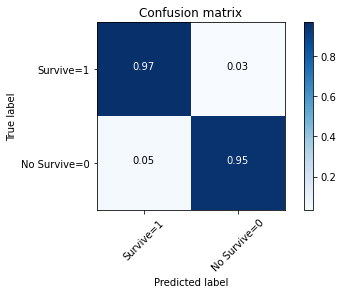

In [330]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,LRpred2, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survive=1','No Survive=0'],normalize= True,  title='Confusion matrix')

In [398]:
Coef = LR.coef_
LR.coef_

array([[-0.46, -0.73, -0.18, -0.11,  0.02,  0.1 ,  0.01, -0.09]])

In [394]:
LR.intercept_

array([-0.35])

In [464]:
LRpredict = pd.DataFrame(data = LRpred2)
GS_df.drop ('Survived', axis = 1, inplace=True)
GS_df = GS_df.join (LRpredict)
GS_df.rename (columns={0:'Survived'}, inplace=True)
GS_df.head ()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [465]:
GS_df.to_csv('data_titanic.csv', index=False)

In [460]:
files.download ('data_titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>